In [1]:
# import all libraries

from pyspark.sql import SQLContext
from pyspark.sql import functions as F
from pyspark.sql.functions import rank,sum,col,max,isnan, when, count
from pyspark.sql import Window

In [2]:
# The sql function on a SQLContext enables applications to run SQL queries programmatically and returns the result as a DataFrame.

sqlContext = SQLContext(sc)
df = sqlContext.sql("SELECT * FROM india_videos")
df.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+--------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
 video_id|trending_date| title| channel_title|category_id| publish_time| tags| views| likes|dislikes|comment_count| thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed| description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+--------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
kzwfHumJyYc| 17.14.11|Sharry Mann: Cute...| Lokdhun Punjabi| 1|2017-11-12T12:20:...|sharry mann|"shar...| 1096327| 33966| 798| 882|https://i.ytimg.c...| FALSE| FALSE| FALSE|Presenting Sharry...|
zUZ1z7FwLc8| 17.14.11|पीरियड्स के समय, ...| HJ NEWS| 25|2017-11-13T05:43:...|पीरियड्स के समय|"...| 590101| 735| 904| 0|https://i.ytimg.c...| TRUE| FALSE| FALSE|पीरियड्स के समय, ...|
10L1hZ9qa58| 17.14.11|Stylish Star Allu...| TFPC| 24|2017-11-12T15:48:...|Stylish Star Allu...| 473988| 2011| 243| 149|https://i.ytimg.c...| FALSE| FALSE| FALSE|Watch Stylish Sta...|
N1vE8iiEg64| 17.14.11|Eruma Saani | Tam...| Eruma Saani| 23|2017-11-12T07:08:...|Eruma Saani|"Tami...| 1242680| 70353| 1624| 2684|https://i.ytimg.c...| FALSE| FALSE| FALSE|This video showca...|
kJzGH0PVQHQ| 17.14.11|why Samantha beca...| Filmylooks| 24|2017-11-13T01:14:...|Filmylooks|"lates...| 464015| 492| 293| 66|https://i.ytimg.c...| FALSE| FALSE| FALSE|why Samantha beca...|
il_pSa5l98w| 17.14.11|MCA (Middle Class...| Dil Raju| 24|2017-11-10T04:29:...|Nenu Local|"Nenu ...| 6106669| 98612| 4185| 4763|https://i.ytimg.c...| FALSE| FALSE| FALSE|Watch MCA- Middle...|
7MxiQ4v0EnE| 17.14.11|Daang ( Full Vide...| Speed Records| 10|2017-11-11T16:41:...|punjabi songs|"pu...| 5718766|127477| 7134| 8063|https://i.ytimg.c...| FALSE| FALSE| FALSE|Song - Daang\nSin...|
c64I9HNpiOY| 17.14.11|Padmavati : Ek Di...| T-Series| 10|2017-11-11T06:14:...|Ek Dil Ek Jaan Vi...|10588371|132738| 8812| 10847|https://i.ytimg.c...| FALSE| FALSE| FALSE|Presenting the so...|
KObFEYCaRx8| 17.14.11|Chiranjeevi in Na...| Top Telugu Media| 24|2017-11-13T04:42:...|Chiranjeevi in Na...| 118223| 520| 53| 23|https://i.ytimg.c...| FALSE| FALSE| FALSE|Chiranjeevi in Na...|
g8QsfJhFpjY| 17.14.11|New bike vs Old b...| Jump Cuts| 24|2017-11-12T04:30:...|Jump cuts|"Jumpcu...| 969030| 59798| 1545| 2404|https://i.ytimg.c...| FALSE| FALSE| FALSE|Jump Cuts is a Ta...|
4du1KXBl4YU| 17.14.11|Mehjabi Reveals H...| TellyMasala| 24|2017-11-12T17:30:...|Hina khan|"Hina k...| 632747| 4330| 2183| 2869|https://i.ytimg.c...| FALSE| FALSE| FALSE|Mehjabi Siddiqui ...|
zOOmEDwPJX0| 17.14.11|Jannat (Full Song...| White Hill Music| 10|2017-11-11T12:02:...|Aatish new punjab...| 2348107| 32834| 710| 1743|https://i.ytimg.c...| FALSE| FALSE| FALSE|A WHITE HILL MUSI...|
Prb_osSVE0M| 17.14.11|Renu Desai Gives ...| ABN Telugu| 25|2017-11-13T09:51:...|Resnu desai|"actr...| 156085| 716| 53| 0|https://i.ytimg.c...| TRUE| FALSE| FALSE|Renu Desai gives ...|
KHxdrECEsD0| 17.14.11|Peehu Srivastav P...|The Voice India Kids| 24|2017-11-11T19:19:...|the voice of indi...| 472413| 2611| 250| 174|https://i.ytimg.c...| FALSE| FALSE| FALSE|Peehu Srivastav g...|
so0ccfs-psI| 17.14.11|Rowi Na | Nadha V...| VS RECORDS| 10|2017-11-12T10:29:...|rowi na|"nadha vi...| 836006| 24460| 180| 594|https://i.ytimg.c...| FALSE| FALSE| FALSE|VS Records & Vika...|
7gShaSuK_PY| 17.14.11|ஜெயலலிதாவின் உயில...| Next Gen| 22|2017-11-13T06:52:...|nextgen|"sasikala...| 89531| 238| 59| 18|https://i.ytimg.c...| FALSE| FALSE| FALSE|ஜெயலலிதாவின் உயில...|
ep3SLMuRbvg| 17.14.11|TYPES OF STUDENTS...| Elvish yadav| 23|2017-11-13T11:26:...|TYPES OF STUDENTS...| 344545| 25717| 417| 2870|https://i.ytimg.c...| FALSE| FALSE| FALSE|This video shows ...|
ePO5M5DE01I| 17.14.11|Tiger Zi

In [3]:
# Print the schema in a tree format
df.printSchema()

root
-- video_id: string (nullable = true)
-- trending_date: string (nullable = true)
-- title: string (nullable = true)
-- channel_title: string (nullable = true)
-- category_id: string (nullable = true)
-- publish_time: string (nullable = true)
-- tags: string (nullable = true)
-- views: string (nullable = true)
-- likes: string (nullable = true)
-- dislikes: string (nullable = true)
-- comment_count: string (nullable = true)
-- thumbnail_link: string (nullable = true)
-- comments_disabled: string (nullable = true)
-- ratings_disabled: string (nullable = true)
-- video_error_or_removed: string (nullable = true)
-- description: string (nullable = true)

In [4]:
# Select videos having likes more than 1 million views
df_filter=df.filter(df['likes'] > 1000000)
display(df_filter.head(1))

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cover""|""official""|""remix""|""official video""|""lyrics""|""session""",33523622,1634126,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,FALSE,FALSE,FALSE,"🎧: https://ad.gt/yt-perfect\n💰: https://atlanti.cr/yt-album\nSubscribe to Ed's channel: http://bit.ly/SubscribeToEdSheeran\n\nFollow Ed on...\nFacebook: http://www.facebook.com/EdSheeranMusic\nTwitter: http://twitter.com/edsheeran\nInstagram: http://instagram.com/teddysphotos\nOfficial Website: http://edsheeran.com\n\nDirector: Jason Koenig\nProducer: Honna Kimmerer\nStarring: Ed Sheeran & Zoey Deutch \nDirector of Photography: Johnny Valencia\nProduction Company: Anonymous Content\nExec Producer: Nina Soriano\nProduction Manager: Doug Hoff\nCommissioner: Dan Curwin\nProduction Designer: John Lavin\nLead Casting: Amy Hubbard \n \nWritten by: Jason Koenig, Ed Sheeran, Andrew Kolvet, Jenny Koenig, Murray Cummings\n\nEdited by: Jason Koenig & Johnny Valencia\nVFX: Ian Hubert\n\nCast: Bo Valencia, Dennis Ranalta, Arthur Pauli\n \nSki Cinematography: Corey Koniniec\nSpecialty Camera op: Ryan Haug\n1st AC: Ryan Brown\n \n1st Assistant Director: Ole Zapatka\nArt Director: Klaus Hartl\nSnow fx: Lucien Stephenson\n\nGaffer: Thomas Berz\nStylist: Claudia Lajda\nHair & Makeup: Christel Thoresen\nAustrian Casting: Ursula Kiplinger\n \nAdditional VFX: Zoic\n\nSpecial Thanks to: The Hintertux Glacier, Austria;\nThe Tenne, and Hotel Neuhintertux"


In [5]:
# Since for 1 video many records are there because of the different trending dates, we will take the latest record for all videos
# For non-numeric but Orderable types, can use agg with max 
from pyspark.sql.functions import col, max

df_lst = df.groupBy('video_id').agg(max('trending_date').alias('last_date'))
df_lst= df_lst.withColumnRenamed('video_id', 'videoid')
df1 = df.join( df_lst,(df.video_id==df_lst.videoid) & (df_lst.last_date==df.trending_date), how = "inner")
display(df1.head(2))
#df_lst.show()

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,videoid,last_date
Prb_osSVE0M,17.14.11,Renu Desai Gives Rating For Pawan kalyan As Husband | Open Heart With RK | ABN Telugu,ABN Telugu,25,2017-11-13T09:51:59.000Z,"Resnu desai|""actress renu desai""|""pawan kalyan wife renu desai""|""pawan kalyan ex-wife renu desai""|""ABN renu desai interview""|""renu desai open heart with RK""|""renu desai rates pawan kalyan""|""renu desai rates 10 for pawan""|""renu desai rates pawan kalyan as husband""|""renu desai interview""|""RK interview with renu desai""|""renu desai interview with RK""|""ABN""|""ABN Telugu""|""ABN News""|""ABN andhrajyothy""|""ABN andhrajyothi""|""renu desai open heart""|""renu commentson pawa kalayna""|""renu desai interivew""",156085,716,53,0,https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg,TRUE,FALSE,FALSE,"Renu Desai gives a low rating for Pawan Kalyan as a husband but gives 10/10 rating as an individual human being. She states that by giving reason a person has different aspects of every relationship. \n\nFor more latest hot and happening news subscribe @ https://www.youtube.com/user/ABNtelugutv?sub_confirmation=1 \n\nFollow us @\nhttps://facebook.com/abntelugutv,\nhttps://twitter.com/abntelugutv,\nhttp://www.abnandhrajyothy.com/\nhttps://play.google.com/store/apps/details?id=com.abn.jyothy&hl=en\nhttps://itunes.apple.com/in/app/abn-andhrajyothy/id582664798?mt=8\nhttps://plus.google.com/+abntelugutv\nhttps://dailymotion.com/abntelugutv\n\nWatch ABN Andhrajyothy, the no 1 Telugu news channel, a 24/7 LIVE news channel dedicated to live reports, exclusive interviews, breaking news, sports, weather, entertainment, business updates and current affairs.",Prb_osSVE0M,17.14.11
1kuJkA9usqg,17.14.11,"Deivamagal Episode 1387, 13/11/17",VikatanTV,24,2017-11-13T15:00:01.000Z,"deivamagal|""deiva magal""|""deiva magal serial""|""VikatanTV""|""deivamagal episode today""|""deivamagal today""|""deivamagal today episode""|""deivamagal episode 1387""|""deivamagal 13 November 2017""|""deiva magal serial 13.11.17""|""deiva magal episode 1387""|""தெய்வமகள்""|""devamagal""|""deivamagal episode""|""deviamagal""|""deivamahal""|""devaimagal""|""divamagal""",387221,2159,1214,711,https://i.ytimg.com/vi/1kuJkA9usqg/default.jpg,FALSE,FALSE,FALSE,Deivamagal Episode 1387\nSubscribe: https://goo.gl/eSvMiG Prev Episode: https://goo.gl/L47PAX Priyamanaval Episode 863: https://goo.gl/opQayu Best of Deivamagal: https://goo.gl/oWdXQ2 Best of Moorthy comedy: https://goo.gl/05WSN4 Deivamagal All Episodes: https://goo.gl/Z5L59u Deivamagal Title Song: https://goo.gl/1kRyA1 Deivamagal Romantic Song: https://goo.gl/Qq6x5B\nChannel: http://www.youtube.com/user/VikatanTV\nFacebook: https://www.facebook.com/deivamagal,1kuJkA9usqg,17.14.11


In [6]:
# Register the DataFrame as a SQL temporary view 

dt_top= df1.select(df1['video_id'],df1['title'],df1['trending_date'],df1['channel_title'],df1['views'].cast('long'),df1['likes'].cast('long'),df1['dislikes'].cast('long'),df1['description'])
dt_top.createOrReplaceTempView("top_videos")

sqlDF = spark.sql("SELECT * FROM top_videos")
display(sqlDF.head(5))

video_id,title,trending_date,channel_title,views,likes,dislikes,description
Prb_osSVE0M,Renu Desai Gives Rating For Pawan kalyan As Husband | Open Heart With RK | ABN Telugu,17.14.11,ABN Telugu,156085,716,53,"Renu Desai gives a low rating for Pawan Kalyan as a husband but gives 10/10 rating as an individual human being. She states that by giving reason a person has different aspects of every relationship. \n\nFor more latest hot and happening news subscribe @ https://www.youtube.com/user/ABNtelugutv?sub_confirmation=1 \n\nFollow us @\nhttps://facebook.com/abntelugutv,\nhttps://twitter.com/abntelugutv,\nhttp://www.abnandhrajyothy.com/\nhttps://play.google.com/store/apps/details?id=com.abn.jyothy&hl=en\nhttps://itunes.apple.com/in/app/abn-andhrajyothy/id582664798?mt=8\nhttps://plus.google.com/+abntelugutv\nhttps://dailymotion.com/abntelugutv\n\nWatch ABN Andhrajyothy, the no 1 Telugu news channel, a 24/7 LIVE news channel dedicated to live reports, exclusive interviews, breaking news, sports, weather, entertainment, business updates and current affairs."
1kuJkA9usqg,"Deivamagal Episode 1387, 13/11/17",17.14.11,VikatanTV,387221,2159,1214,Deivamagal Episode 1387\nSubscribe: https://goo.gl/eSvMiG Prev Episode: https://goo.gl/L47PAX Priyamanaval Episode 863: https://goo.gl/opQayu Best of Deivamagal: https://goo.gl/oWdXQ2 Best of Moorthy comedy: https://goo.gl/05WSN4 Deivamagal All Episodes: https://goo.gl/Z5L59u Deivamagal Title Song: https://goo.gl/1kRyA1 Deivamagal Romantic Song: https://goo.gl/Qq6x5B\nChannel: http://www.youtube.com/user/VikatanTV\nFacebook: https://www.facebook.com/deivamagal
znOC3IU0dF8,Hero Tarun at #ChaySamWeddingReception | Samantha & Naga Chaitanya Reception Videos | News Mantra,17.14.11,News Mantra,55178,45,94,null
z3V9LUA6VQM,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయాయ్యి..! దీంతో ఆమె ఏం చేసిందో తెలుసా..|| OmFut,17.14.11,OmFut,236710,858,197,null
gW4Su5wq0b8,Neeya Naana - 12th November 2017 - Promo 2,17.14.11,Vijay Television,261202,1971,126,#நீயாநானா | ஞாயிறு மதியம் 3 மணிக்கு உங்கள் விஜயில்.. \nClick here http://www.hotstar.com/tv/neeya-naana/1584 to watch the show on hotstar. \n#NeeyaNaana. #VijayTV #VijayTelevision #StarVijayTV #StarVijay #TamilTV #RedefiningEntertainment #Gopi #NeeyaNaana #Gopinath #NeeyaNaanaGopi #Gobinath


In [7]:
# check how many null values in a columns
# from pyspark.sql.functions import isnan, when, count, col

display(sqlDF.select([count(when(isnan(c), c)).alias(c) for c in sqlDF.columns]))

video_id,title,trending_date,channel_title,views,likes,dislikes,description
0,0,0,0,0,0,0,0


In [8]:
# withColumn Returns a new DataFrame by adding a column or replacing the existing column that has the same name
# calculate liking percent out of total views

sqlDF= sqlDF.withColumn('like_prct', sqlDF.likes*100/sqlDF.groupBy('video_id').agg({'views': 'sum'}).collect()[0][1])
sqlDF.show()


+-----------+--------------------+-------------+--------------------+-------+------+--------+--------------------+--------------------+
 video_id| title|trending_date| channel_title| views| likes|dislikes| description| like_prct|
+-----------+--------------------+-------------+--------------------+-------+------+--------+--------------------+--------------------+
Prb_osSVE0M|Renu Desai Gives ...| 17.14.11| ABN Telugu| 156085| 716| 53|Renu Desai gives ...| 0.47540319635612743|
1kuJkA9usqg|Deivamagal Episod...| 17.14.11| VikatanTV| 387221| 2159| 1214|Deivamagal Episod...| 1.4335132694593284|
znOC3IU0dF8|Hero Tarun at #Ch...| 17.14.11| News Mantra| 55178| 45| 94| null|0.029878692508415832|
z3V9LUA6VQM|ఆమె బ్యాంకు అకౌంట...| 17.14.11| OmFut| 236710| 858| 197| null| 0.5696870704937952|
gW4Su5wq0b8|Neeya Naana - 12t...| 17.14.11| Vijay Television| 261202| 1971| 126|#நீயாநானா | ஞாயி...| 1.3086867318686135|
qP67alYxSiU|కెమెరాలో రికార్డ్...| 17.14.11| HOTNEWS TELUGU| 128851| 0| 0| null| 0.0|
1OTwWFJY_0I|[PWW] Plenty Wron...| 17.14.11| Bollywood Sins| 156063| 5406| 534|[PWW] Plenty Wron...| 3.5894269266776884|
JSkOecmAFFo|Girls On A Date f...| 17.14.11| The Timeliners| 793778| 21956| 1590|Planning to go on...| 14.5781460603284|
Yvp9jUJtMuY|Naa Show Naa Isht...| 17.14.11| ETV Plus India| 309490| 1560| 200|☛ For latest upda...| 1.0357946736250823|
7yTWI873yfg|Review On Bigg Bo...| 17.14.11|Saas Bahu Aur Bet...| 334780| 1307| 230|Checkout this vid...| 0.867810024633322|
l3fRny54z4U|സൗബിനെ വെറും 30 ...| 17.14.11| Asianet| 54861| 247| 20|സൗബിനെ വെറും 30 ...| 0.16400082332397134|
MXH7yFFl3fE|8 राशियों की लगें...| 17.14.11| AstroMitram| 97522| 838| 189|8 राशियों की लगें...| 0.5564076516011659|
hDUel4MX-Fw|13 November 2017-...| 17.14.11| Study IQ education| 47352| 2240| 31|#childrenDay #Sal...| 1.487294915974477|
TuOBfQRXwhQ|13 नवम्बर से इन 9...| 17.14.11| Brijnaari Sumi| 109594| 790| 189|13 नवम्बर से इन 9...| 0.5245370462588557|
1WTtrHW7uw8|Bigg Boss 11 | Ev...| 17.14.11| BookMyTV| 150806| 1311| 508|Please Subscribe ...| 0.8704659084118479|
w5qMOyPuUqU|வாணி ராணி - VAANI...| 17.14.11| RadaanMedia| 170707| 1152| 178|Subscribers Link:...| 0.7648945282154453|
8vBjlhp73hU|భార్య తో వెంకటేష్...| 17.14.11| Around Telugu| 154502| 543| 15|Samantha Naga Cha...| 0.36053622293488435|
WPuhu6dYyQY|Baal Veer - बाल व...| 17.14.11| Sony PAL| 433053| 938| 298|Subscribe to Sony...| 0.6228047460643122|
XjF2n3NaoSk|Konchem Touch Lo ...| 17.14.11| Pradeep Machiraju|1025941| 6019| 234|Watch Konchem Tou...| 3.996441115736775|
ozZ8HpIBsGw|Mersal - A minute...| 17.14.11| Sony Music India|1449239|120289| 3108|‘Aalaporaan Thami...| 79.86840095877405|
+-----------+--------------------+-------------+--------------------+-------+------+--------+--------------------+--------------------+
only showing top 20 rows

In [9]:
# collecting statictics for each Channel based on views
# fill missing data with 0

sqlDF =sqlDF.na.fill(0)

# By Windowing function
window1 = Window.partitionBy('channel_title')
window2 = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
tab = sqlDF.select('channel_title',
F.sum('views').over(window1).alias('views_total'),F.max(col('views')).over(window1).alias('views_max'),F.min(col('views')).over(window1).alias('views_min')
).withColumn('total',sum(col('views_total')).over(window2)).\
withColumn('Percent',col('views_total')*100/col('total')).\
drop(col('total')).distinct()

display(tab.head(5))

channel_title,views_total,views_max,views_min,Percent
And TV,11074352,732022,12129,0.002097237369311077
DREAMS N BEYOND,702100,321020,61085,1.3296221368016E-4
Gaurav Chaudhary,5713407,1803421,163643,0.0010819929388630137
NYOOOZ TV,264976,264976,264976,5.0180594690377547E-5
Natural HealthCare,6968129,1297660,23872,0.0013196095385969516


In [10]:
# By group by Function calculating statistics
window2 = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

tab1 = sqlDF.select(['channel_title','views']).groupBy('channel_title').\
agg(F.sum(col('views')).alias('views_total'),
F.max(col('views')).alias('views_max'),F.min(col('views')).alias('views_min'),F.mean(col('views')).alias('views_avg'))\
.withColumn('total',sum(col('views_total')).over(window2)).\
withColumn('Percent',col('views_total')*100/col('total')).\
drop(col('total'))

display(tab1.head(5))

channel_title,views_total,views_max,views_min,views_avg,Percent
Natural HealthCare,6968129,1297660,23872,183371.81578947368,0.05612194796332947
DREAMS N BEYOND,702100,321020,61085,234033.33333333334,0.005654777583057607
And TV,11074352,732022,12129,123048.35555555555,0.08919384337913286
Gaurav Chaudhary,5713407,1803421,163643,714175.875,0.04601630227387041
Telugucine Buzz,50432,50432,50432,50432.0,4.061839382833802E-4


In [11]:
# top 10 views
display(tab1.orderBy(F.col('views_total').desc()).limit(10))

channel_title,views_total,views_max,views_min,views_avg,Percent
T-Series,625512200,34631260,57483,8340162.666666667,5.037932440519935
5-Minute Crafts,220009661,6542112,336732,1982069.018018018,1.7719779220608225
Zee Music Company,210035778,15521288,12408,4375745.375,1.691647356607982
Speed Records,194072017,18189708,30146,3234533.6166666667,1.5630737661734437
Marvel Entertainment,192612040,45064699,285789,1.0700668888888888E7,1.5513149779504274
FoxStarHindi,177228056,41978366,1577161,1.9692006222222224E7,1.4274109644746877
Amit Bhadana,174916606,15014500,4686186,8745830.3,1.4087943348715564
ETV Jabardasth,174433359,4212327,166882,1557440.705357143,1.4049022193571286
PewDiePie,165146497,13241801,1920497,4128662.425,1.3301049838428862
YRF,161645639,40953758,105850,6465825.56,1.3019087534770295


In [12]:
tab.count() # so we have 1454 channels data

# selecting top 10 channels
def top_10(df, val_col, K):
    k_rows = (df.orderBy(F.col(val_col).desc()).limit(K).select(F.min(val_col).alias('min1')).first()['min1'])
    return df.filter(df[val_col] >= k_rows)
  
a= top_10(tab1,'views_total',8)
display(a.head(3))

channel_title,views_total,views_max,views_min,views_avg,Percent
Speed Records,194072017,18189708,30146,3234533.6166666667,1.5630737661734437
5-Minute Crafts,220009661,6542112,336732,1982069.018018018,1.7719779220608225
T-Series,625512200,34631260,57483,8340162.666666667,5.037932440519935


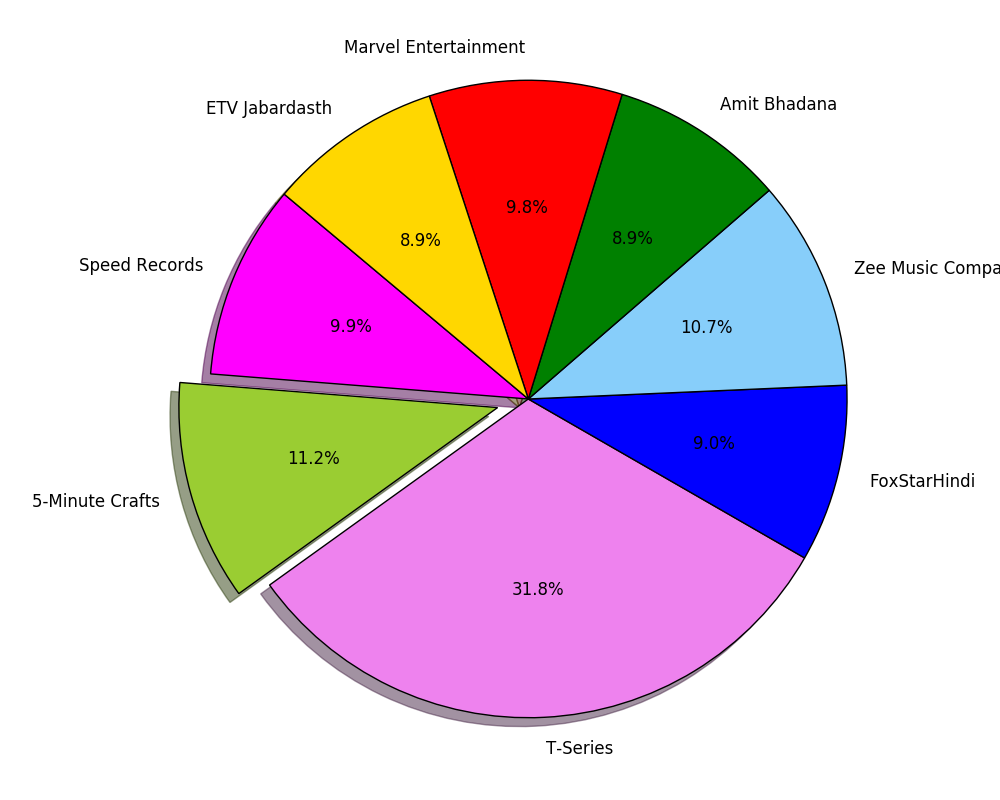

In [13]:
# select top 10 channels and plot pie chart
import matplotlib.pyplot as plt

plot_data= a.select('channel_title','Percent').toPandas()
labels = plot_data.channel_title
sizes = plot_data.Percent
colors = ['magenta', 'yellowgreen', 'violet','blue', 'lightskyblue','green','red','gold']
explode = (0, 0.1, 0, 0,0,0,0,0) # explode 1st slice
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display(plt.show())

In [14]:
# AnalysisException: 'It is not allowed to use a window function inside an aggregate function. Please use the inner window function in a sub-query.;'